In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import networkx as nx
import import_ipynb
import cartopy.crs as ccrs
from shapely.geometry import Polygon

In [2]:
vertices = pd.read_csv("database/substations_kalimantan_tab.csv")
vertices.rename(columns = {"lon":"x", "lat":"y"}, inplace = True)

print(vertices["v_nom"].value_counts(dropna = False))

150    63
275     1
Name: v_nom, dtype: int64


In [3]:
vertices

,node,type,x,y,frequency,v_nom,carrier,node_id,location,maps,wkt_srid_4326
0,GI_Sambas,substation,109.2688,1.3429,50,150,AC,0,Kalimantan Barat,1.3429 109.2688,SRID=4326;POINT(109.2688 1.3429)
1,GI_Singkawang,substation,108.9876,0.9266,50,150,AC,1,Kalimantan Barat,0.9266 108.9876,SRID=4326;POINT(108.9876 0.9266)
2,GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,AC,2,Kalimantan Barat,0.8361 108.8747,SRID=4326;POINT(108.8747 0.8361)
3,GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,AC,3,Kalimantan Barat,0.83 108.8653,SRID=4326;POINT(108.8653 0.83)
4,GI_Senggiring,substation,108.9853,0.3162,50,150,AC,4,Kalimantan Barat,0.3162 108.9853,SRID=4326;POINT(108.9853 0.3162)
...,...,...,...,...,...,...,...,...,...,...,...
59,GI_Sangatta,substation,117.5693,0.4701,50,150,AC,59,Kalimantan Timur,0.4701 117.5693,SRID=4326;POINT(117.5693 0.4701)
60,GI_Malinau,substation,116.6286,3.5114,50,150,AC,60,Kalimantan Utara,3.5114 116.6286,SRID=4326;POINT(116.6286 3.5114)
61,GI_Tideng_Pale,substation,116.8411,3.5748,50,150,AC,61,Kalimantan Utara,3.5748 116.8411,SRID=4326;POINT(116.8411 3.5748)
62,GI_Muara_Wahau,substation,116.9215,1.0533,50,150,AC,62,Kalimantan Timur,1.0533 116.9215,SRID=4326;POINT(116.9215 1.0533)


In [4]:
links = pd.read_csv("database/lines_kalimantan_tab.csv")

print(links["v_nom"].value_counts(dropna = False))

150    65
Name: v_nom, dtype: int64


In [5]:
links

,nodeA,nodeB,bus0,bus1,v_nom,capital_cost,length,carrier,cables,wires,r,x,lon0,lat0,lon1,lat1,wkt_srid_4326
0,GI_Sambas,GI_Singkawang,0,1,150,10,59.200,AC,3,2,0.08,0.32,109.2688,1.3429,108.9876,0.9266,"'SRID=4326;LINESTRING(109.2688 1.3429,108.9876..."
1,GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,10,20.829,AC,3,2,0.08,0.32,108.9876,0.9266,108.8653,0.8300,"'SRID=4326;LINESTRING(108.9876 0.9266,108.8653..."
2,GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,10,1.393,AC,3,2,0.08,0.32,108.8653,0.8300,108.8747,0.8361,"'SRID=4326;LINESTRING(108.8653 0.83,108.8747 0..."
3,GI_Singkawang,GI_Senggiring,1,4,150,10,70.613,AC,3,2,0.08,0.32,108.9876,0.9266,108.9853,0.3162,"'SRID=4326;LINESTRING(108.9876 0.9266,108.9853..."
4,GI_Senggiring,GI_Parit_Baru,4,5,150,10,42.848,AC,3,2,0.08,0.32,108.9853,0.3162,109.2055,0.0592,"'SRID=4326;LINESTRING(108.9853 0.3162,109.2055..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GI_Teluk_Pandan,GI_Sangatta,58,59,150,10,42.347,AC,3,2,0.08,0.32,117.4350,0.1614,117.5693,0.4701,"'SRID=4326;LINESTRING(117.435 0.1614,117.5693 ..."
61,GI_Malinau,GI_Tideng_Pale,60,61,150,10,28.625,AC,3,2,0.08,0.32,116.6286,3.5114,116.8411,3.5748,"'SRID=4326;LINESTRING(116.6286 3.5114,116.8411..."
62,GI_Muara_Wahau,GI_Sangatta,62,59,150,10,95.892,AC,3,2,0.08,0.32,116.9215,1.0533,117.5693,0.4701,"'SRID=4326;LINESTRING(116.9215 1.0533,117.5693..."
63,GI_Muara_Wahau,GI_Bulungan,62,63,150,10,197.219,AC,3,2,0.08,0.32,116.9215,1.0533,117.3678,2.8101,"'SRID=4326;LINESTRING(116.9215 1.0533,117.3678..."


In [6]:
# build the network
# don't forget to pray for the best

network = pypsa.Network()

pypsa.io.import_components_from_dataframe(network, vertices, "Bus")
pypsa.io.import_components_from_dataframe(network, links, "Line")

In [7]:
network.buses

,node,type,x,y,frequency,v_nom,carrier,node_id,location,maps,wkt_srid_4326,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,,,,,,,
0,GI_Sambas,substation,109.2688,1.3429,50,150.0,AC,0,Kalimantan Barat,1.3429 109.2688,SRID=4326;POINT(109.2688 1.3429),None,1.0,0.0,inf,PQ,
1,GI_Singkawang,substation,108.9876,0.9266,50,150.0,AC,1,Kalimantan Barat,0.9266 108.9876,SRID=4326;POINT(108.9876 0.9266),None,1.0,0.0,inf,PQ,
2,GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150.0,AC,2,Kalimantan Barat,0.8361 108.8747,SRID=4326;POINT(108.8747 0.8361),None,1.0,0.0,inf,PQ,
3,GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150.0,AC,3,Kalimantan Barat,0.83 108.8653,SRID=4326;POINT(108.8653 0.83),None,1.0,0.0,inf,PQ,
4,GI_Senggiring,substation,108.9853,0.3162,50,150.0,AC,4,Kalimantan Barat,0.3162 108.9853,SRID=4326;POINT(108.9853 0.3162),None,1.0,0.0,inf,PQ,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,GI_Sangatta,substation,117.5693,0.4701,50,150.0,AC,59,Kalimantan Timur,0.4701 117.5693,SRID=4326;POINT(117.5693 0.4701),None,1.0,0.0,inf,PQ,
60,GI_Malinau,substation,116.6286,3.5114,50,150.0,AC,60,Kalimantan Utara,3.5114 116.6286,SRID=4326;POINT(116.6286 3.5114),None,1.0,0.0,inf,PQ,
61,GI_Tideng_Pale,substation,116.8411,3.5748,50,150.0,AC,61,Kalimantan Utara,3.5748 116.8411,SRID=4326;POINT(116.8411 3.5748),None,1.0,0.0,inf,PQ,


In [8]:
network.lines

,nodeA,nodeB,bus0,bus1,v_nom,capital_cost,length,carrier,cables,wires,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,GI_Sambas,GI_Singkawang,0,1,150,10.0,59.200,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,10.0,20.829,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,10.0,1.393,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GI_Singkawang,GI_Senggiring,1,4,150,10.0,70.613,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GI_Senggiring,GI_Parit_Baru,4,5,150,10.0,42.848,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,GI_Teluk_Pandan,GI_Sangatta,58,59,150,10.0,42.347,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,GI_Malinau,GI_Tideng_Pale,60,61,150,10.0,28.625,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,GI_Muara_Wahau,GI_Sangatta,62,59,150,10.0,95.892,AC,3,2,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
lines_current_type = network.lines.bus0.map(network.buses.carrier)
lines_current_type

Line
0     AC
1     AC
2     AC
3     AC
4     AC
      ..
60    AC
61    AC
62    AC
63    AC
64    AC
Name: bus0, Length: 65, dtype: object

In [10]:
# we inspect the topology of the network
# therefore use the function determine_network_topology
# and inspect the subnetworks in network.sub_networks

network.determine_network_topology()
network.sub_networks["n_branches"] = [len(sn.branches()) for sn in network.sub_networks.obj]
network.sub_networks["n_buses"] = [len(sn.buses()) for sn in network.sub_networks.obj]

network.sub_networks

attribute,carrier,slack_bus,obj,n_branches,n_buses
SubNetwork,,,,,
0,AC,0,SubNetwork 0,13,13
1,AC,13,SubNetwork 1,52,51


In [11]:
# determine the voltage of the buses by the lines which end there

network.lines.v_nom.value_counts()

buses_by_v_nom = {}
for v_nom in network.lines.v_nom.value_counts().index:
    buses_by_v_nom[v_nom] = set(network.lines[network.lines.v_nom == v_nom].bus0)\
                                | set(network.lines[network.lines.v_nom == v_nom].bus1)

In [12]:
# give proprity to 150 kV

network.buses["v_nom"] = 150
network.buses.loc[buses_by_v_nom[150], "v_nom"] = 150

network.buses.v_nom.value_counts(dropna = False)

C:\Users\hilma\AppData\Local\Temp/ipykernel_11700/883949259.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  network.buses.loc[buses_by_v_nom[150], "v_nom"] = 150


150    64
Name: v_nom, dtype: int64

In [13]:
# connect buses which are close 

pairs = pd.Series()

for i,u in enumerate(network.buses.index):
    vs = network.buses[["x", "y"]].iloc[i + 1:]
    distance_km = pypsa.geo.haversine(vs, network.buses.loc[u, ["x", "y"]])
    
    to_add = pd.Series(data=distance_km[:,0],index=[(u,v) for v in vs.index])
    
    pairs = pd.concat((pairs,to_add))

pairs.sort_values().head()

C:\Users\hilma\AppData\Local\Temp/ipykernel_11700/1568330788.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pairs = pd.Series()


(11, 12)    0.111749
(2, 3)      1.245936
(22, 23)    4.192452
(49, 50)    5.025279
(54, 56)    6.959922
dtype: float64

In [14]:
# determine topology so we can look what's actually connected

network.determine_network_topology()

In [15]:
# Example all substations which are close to each other geographically by not connected in network.adj

start = 0  #km
stop = 10 #km

for (u,v),dist in pairs.sort_values().iteritems():
    if dist < start:
        continue
    if dist > stop:
        break
    if u in network.graph().adj[v]:
        continue

    print(u,v,dist)

    u_x = network.buses.at[u,"x"]
    u_y = network.buses.at[u,"y"]
    v_x = network.buses.at[v,"x"]
    v_y = network.buses.at[v,"y"]

    #have a look what's going on in OSM
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(u_y,u_x))
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(v_y,v_x))

6 7 8.97414670697867
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0002/109.328
6 8 9.142656618529632
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0735/109.3809


In [16]:
"""# connect <1 km substations (if any)

limit = 1.0

for (u,v),dist in pairs.sort_values().iteritems():

    #only go up to pairs stop km apart
    if dist > limit:
        break

    #ignore if they're already connected
    if u in network.graph().adj[v]:
        continue


    kv_u = network.buses.at[u,"v_nom"]
    kv_v = network.buses.at[v,"v_nom"]

    print(u,v,dist,kv_u,kv_v)

    last_kalimantan_line = int(network.lines.index[-1])

    voltage = max(kv_u,kv_v)*1000

    wires = {150 : 2}[voltage]

    cables = 6

    df = pd.DataFrame([[u,v,length_factor*dist,wires,cables,voltage]],columns=["bus0","bus1","length","wires","cables","voltage"],index=[str(last_kalimantan_line+1)])

    pypsa.io.import_components_from_dataframe(network,df,"Line")"""

'# connect <1 km substations (if any)\n\nlimit = 1.0\n\nfor (u,v),dist in pairs.sort_values().iteritems():\n\n    #only go up to pairs stop km apart\n    if dist > limit:\n        break\n\n    #ignore if they\'re already connected\n    if u in network.graph().adj[v]:\n        continue\n\n\n    kv_u = network.buses.at[u,"v_nom"]\n    kv_v = network.buses.at[v,"v_nom"]\n\n    print(u,v,dist,kv_u,kv_v)\n\n    last_kalimantan_line = int(network.lines.index[-1])\n\n    voltage = max(kv_u,kv_v)*1000\n\n    wires = {150 : 2}[voltage]\n\n    cables = 6\n\n    df = pd.DataFrame([[u,v,length_factor*dist,wires,cables,voltage]],columns=["bus0","bus1","length","wires","cables","voltage"],index=[str(last_kalimantan_line+1)])\n\n    pypsa.io.import_components_from_dataframe(network,df,"Line")'

In [17]:
# split buses with more than one voltage (if any)
# add trafos between them

network.lines.v_nom.value_counts()


buses_by_v_nom = {}

for v_nom in network.lines.v_nom.value_counts().index:
    buses_by_v_nom[v_nom] = set(network.lines[network.lines.v_nom == v_nom].bus0)\
                                | set(network.lines[network.lines.v_nom == v_nom].bus1)

(<matplotlib.collections.PatchCollection at 0x2bd531e9190>,
 <matplotlib.collections.LineCollection at 0x2bd5320d880>)

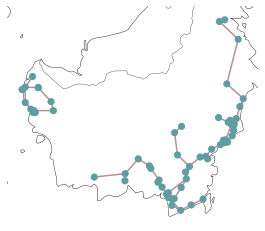

In [18]:
# determine the connected components (again?)

network.determine_network_topology()

network.plot()

In [19]:
# recalculate all electrical properties

network.lines["type"] = network.lines.v_nom.map({150 : "NAYY 4x150 SE"})

network.lines["num_parallel"] = network.lines.cables/3.*network.lines.wires/network.lines.v_nom.map({150 : 2.})

network.lines["s_nom"] = 3.**0.5*network.lines.v_nom*network.lines.num_parallel*network.lines.v_nom.map({150 : 2.})*0.65

In [20]:
# create time index as series

network.set_snapshots(pd.date_range("2021-01-01 00:00:00", "2021-12-31 23:00:00", freq = "H"))

print(network.snapshots)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')


In [21]:
power_plants = pd.read_csv('database/generators_tab.csv', sep = ",", quotechar = "'")

In [22]:
power_plants

,name,bus,p_nom,carrier,efficiency,capital_cost,marginal_cost,build_year,lifetime,control
0,PLTA_IR._PM_Noor,24,30.00,Run_of_River,0.33,1.90,0.37,1973,80.0,PQ
1,PLTA_SESCO_275,10,90.00,Run_of_River,0.33,1.90,0.37,2016,80.0,PQ
2,PLTBg_Maju_Aneka_Sawit,14,1.00,Biomass,0.29,2.50,3.00,2014,30.0,PQ
3,PLTBg_Rea_Kaltim,53,2.00,Biomass,0.29,2.50,3.00,2011,30.0,PQ
4,PLTBg_Suka_Damai,29,2.40,Biomass,0.29,2.50,3.00,2020,30.0,PQ
...,...,...,...,...,...,...,...,...,...,...
404,PLTU_Tanjung_Redep_/_Berau_#02,58,9.13,Coal,0.34,1.65,0.13,2020,40.0,PQ
405,PLTU_Teluk_Balikpapan_#01,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ
406,PLTU_Teluk_Balikpapan_#02,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ
407,PLTU_Tembilok_(IPP_Ketapang)_#01,9,7.50,Coal,0.34,1.65,0.13,2019,40.0,PQ


In [23]:
pypsa.io.import_components_from_dataframe(network, power_plants, "Generator")

In [24]:
network.generators

,name,bus,p_nom,carrier,efficiency,capital_cost,marginal_cost,build_year,lifetime,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
0,PLTA_IR._PM_Noor,24,30.00,Run_of_River,0.33,1.90,0.37,1973,80.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
1,PLTA_SESCO_275,10,90.00,Run_of_River,0.33,1.90,0.37,2016,80.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
2,PLTBg_Maju_Aneka_Sawit,14,1.00,Biomass,0.29,2.50,3.00,2014,30.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
3,PLTBg_Rea_Kaltim,53,2.00,Biomass,0.29,2.50,3.00,2011,30.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
4,PLTBg_Suka_Damai,29,2.40,Biomass,0.29,2.50,3.00,2020,30.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,PLTU_Tanjung_Redep_/_Berau_#02,58,9.13,Coal,0.34,1.65,0.13,2020,40.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
405,PLTU_Teluk_Balikpapan_#01,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
406,PLTU_Teluk_Balikpapan_#02,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [25]:
network.buses.generator

Bus
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: generator, Length: 64, dtype: float64

In [26]:
for sn in network.sub_networks.obj:
    print(sn,network.sub_networks.at[sn.name,"carrier"],len(sn.buses()),len(sn.branches()))

SubNetwork 0 AC 13 13
SubNetwork 1 AC 51 52


In [27]:
network.determine_network_topology()

In [28]:
load = pd.read_csv(r'database/input_data/loads_kalimantan.csv', index_col = False)

In [29]:
load

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,...,69.8134,69.8134,69.8134,69.8134,69.8134,69.8134,98.9647,98.9647,69.8134,98.9647
1,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,...,67.4312,67.4312,67.4312,67.4312,67.4312,67.4312,95.5877,95.5877,67.4312,95.5877
2,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,...,65.2224,65.2224,65.2224,65.2224,65.2224,65.2224,92.4567,92.4567,65.2224,92.4567
3,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,...,63.1718,63.1718,63.1718,63.1718,63.1718,63.1718,89.5498,89.5498,63.1718,89.5498
4,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,...,61.3405,61.3405,61.3405,61.3405,61.3405,61.3405,86.9538,86.9538,61.3405,86.9538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,...,75.4909,75.4909,75.4909,75.4909,75.4909,75.4909,107.0129,107.0129,75.4909,107.0129
8756,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,...,77.0977,77.0977,77.0977,77.0977,77.0977,77.0977,109.2907,109.2907,77.0977,109.2907
8757,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,...,75.3531,75.3531,75.3531,75.3531,75.3531,75.3531,106.8176,106.8176,75.3531,106.8176
8758,169.9393,169.9393,169.9393,169.9393,169.9393,169.9393,169.9393,169.9393,169.9393,169.9393,...,72.0885,72.0885,72.0885,72.0885,72.0885,72.0885,102.1897,102.1897,72.0885,102.1897


In [30]:
def generate_dummy_graph(network):
    graph = pypsa.descriptors.OrderedGraph()
    graph.add_nodes_from([bus for bus in network.buses.index])

    #add positions to graph for voronoi cell computation
    for nodes in graph.nodes():
        graph.nodes[nodes]["pos"] = np.array(network.buses.loc[nodes,["x","y"]],dtype=float)

    return graph

In [31]:
graph = generate_dummy_graph(network)

graph.name = "kalimantan_01"

In [32]:
print(len(graph.nodes))

64


In [33]:
loadz = np.array(load)

In [34]:
loadz

array([[164.5761, 164.5761, 164.5761, ...,  98.9647,  69.8134,  98.9647],
       [158.9604, 158.9604, 158.9604, ...,  95.5877,  67.4312,  95.5877],
       [153.7535, 153.7535, 153.7535, ...,  92.4567,  65.2224,  92.4567],
       ...,
       [177.6354, 177.6354, 177.6354, ..., 106.8176,  75.3531, 106.8176],
       [169.9393, 169.9393, 169.9393, ..., 102.1897,  72.0885, 102.1897],
       [165.2375, 165.2375, 165.2375, ...,  99.3624,  70.0939,  99.3624]])

In [35]:
pypsa.io.import_components_from_dataframe(network, loadz, "Load")

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '8750', '8751', '8752', '8753', '8754', '8755', '8756', '8757', '8758',
       '8759'],
      dtype='object', length=8760)


In [ ]:
print(len(loadz))

In [ ]:
loadss = pd.DataFrame(loadz, index = network.snapshots, columns = network.buses.index)

loadss

In [ ]:
bus = network.buses.index

In [ ]:
load_check = pd.Series(data = loads)

In [ ]:
load_check

In [37]:
for bus in graph.nodes():
    network.add("Load", bus, bus = bus,
                p_set = pd.Series(data = load.loc[network.snapshots, bus], index = network.snapshots))

KeyError: "None of [DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',\n               '2021-01-01 02:00:00', '2021-01-01 03:00:00',\n               '2021-01-01 04:00:00', '2021-01-01 05:00:00',\n               '2021-01-01 06:00:00', '2021-01-01 07:00:00',\n               '2021-01-01 08:00:00', '2021-01-01 09:00:00',\n               ...\n               '2021-12-31 14:00:00', '2021-12-31 15:00:00',\n               '2021-12-31 16:00:00', '2021-12-31 17:00:00',\n               '2021-12-31 18:00:00', '2021-12-31 19:00:00',\n               '2021-12-31 20:00:00', '2021-12-31 21:00:00',\n               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],\n              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')] are in the [index]"

In [ ]:
network.loads

In [ ]:
%matplotlib inline

pd.DataFrame(load.sum(axis = 1)).plot()

load_distribution = network.loads_t.p_set.loc[network.snapshots[0]].groupby(network.loads.bus).sum()
network.plot(bus_sizes = load_distribution)

total_load = load.sum(axis = 1)
monthly_load = total_load.resample("M").sum()
monthly_load.plot(grid = True)

In [ ]:
# determine the connected components again for checking the generators (perhaps)

network.determine_network_topology()

network.plot()

In [ ]:
#poly = Polygon([[106.5,3.1],[121.7,5.1],[116.5,-5.6],[109.2,-4.2]])

In [ ]:
"""
def voronoi_partition(G, outline):
    """
    For 2D-embedded graph `G`, within the boundary given by the shapely polygon
    `outline`, returns `G` with the Voronoi cell region as an additional node
    attribute.
    """
    G = graph.polygon_subgraph(G, outline, copy=False)
    points = list(graph.get_node_attributes(G, 'pos').values())
    regions = graph.voronoi_partition_pts(points, outline, no_multipolygons=True)
    nx.set_node_attributes(G, 'region', dict(zip(G.nodes(), regions)))

    return G

"""

In [ ]:
#voronoi_partition(graph, poly)

In [ ]:
from pypsa.networkclustering import get_clustering_from_busmap, busmap_by_kmeans

In [ ]:
weighting = pd.Series(1, network.buses.index)
busmap2 = busmap_by_kmeans(network, bus_weightings=weighting, n_clusters=20)

In [ ]:
C2 = get_clustering_from_busmap(network, busmap2)
nc2 = C2.network

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(12,12))
plot_kwrgs = dict(bus_sizes=1e-3, line_widths=0.5)
network.plot(ax=ax, title="original", **plot_kwrgs)
nc2.plot(ax=ax1, title="clustered by kmeans", **plot_kwrgs)
fig.tight_layout()

In [ ]:
nc2.buses

In [ ]:
nc2.lines

In [ ]:
nc2.generators